In [2]:
import autograd
import autograd.numpy as ag_np
import CollabFilterMeanOnly
import CollabFilterOneScalarPerItem
import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets

In [3]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()


In [31]:
model_large = CollabFilterMeanOnly.CollabFilterMeanOnly(
    n_epochs=10, batch_size=10000, step_size=0.1)
model_large.init_parameter_dict(n_users, n_items, train_tuple)
model_large.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.63800 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     7.03040
epoch       0.143 | loss_total     9.33072 | train_MAE     2.82755 | valid_MAE     2.84200 | grad_wrt_mu     5.68192
epoch       0.286 | loss_total     6.40404 | train_MAE     2.29264 | valid_MAE     2.30556 | grad_wrt_mu     4.53114
epoch       0.429 | loss_total     4.49626 | train_MAE     1.89513 | valid_MAE     1.90551 | grad_wrt_mu     3.57311
epoch       0.571 | loss_total     3.34473 | train_MAE     1.60017 | valid_MAE     1.60872 | grad_wrt_mu     2.88409
epoch       0.714 | loss_total     2.60167 | train_MAE     1.41250 | valid_MAE     1.42006 | grad_wrt_mu     2.33007
epoch       0.857 | loss_total     2.13770 | train_MAE     1.26089 | valid_MAE     1.26765 | grad_wrt_mu     1.89066
epoch       1.000 | loss_total     1.81930 | train_MAE     1.13787 | valid_MAE     1.14397 | grad_wrt_mu     1.47312
epoch       1.143 | loss_total     1.60887 | train_MAE     1.042

In [32]:
float(model_large.param_dict['mu'])

3.531814950092181

In [33]:
ag_np.min(model_large.trace_mae_valid)

0.9445319132055255

In [34]:
model_large.evaluate_perf_metrics(*test_tuple)

{'mse': 1.270817685668225, 'mae': 0.9456293520325518}

In [35]:
model_small = CollabFilterMeanOnly.CollabFilterMeanOnly(
    n_epochs=10, batch_size=100, step_size=0.1)
model_small.init_parameter_dict(n_users, n_items, train_tuple)
model_small.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.41000 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     7.02000
epoch       0.001 | loss_total     9.65436 | train_MAE     2.82859 | valid_MAE     2.84304 | grad_wrt_mu     5.81600
epoch       0.003 | loss_total     6.51272 | train_MAE     2.28179 | valid_MAE     2.29464 | grad_wrt_mu     4.57280
epoch       0.004 | loss_total     4.21487 | train_MAE     1.88062 | valid_MAE     1.89091 | grad_wrt_mu     3.55824
epoch       0.126 | loss_total     1.22742 | train_MAE     0.95181 | valid_MAE     0.95272 | grad_wrt_mu     0.51310
epoch       0.250 | loss_total     1.14284 | train_MAE     0.93184 | valid_MAE     0.93099 | grad_wrt_mu     0.37114
epoch       0.376 | loss_total     1.27709 | train_MAE     0.94347 | valid_MAE     0.94365 | grad_wrt_mu     0.21898
epoch       0.500 | loss_total     1.54991 | train_MAE     0.94859 | valid_MAE     0.94922 | grad_wrt_mu     0.00558
epoch       0.626 | loss_total     0.87029 | train_MAE     0.946

In [36]:
float(model_small.param_dict['mu'])

3.5822567910722225

In [37]:
ag_np.min(model_small.trace_mae_valid)

0.9309930114923441

In [38]:
model_small.evaluate_perf_metrics(*test_tuple)

{'mse': 1.2759461954682036, 'mae': 0.9415536512813646}

In [39]:
import matplotlib
import matplotlib.pyplot as plt

(0.93, 1.0)

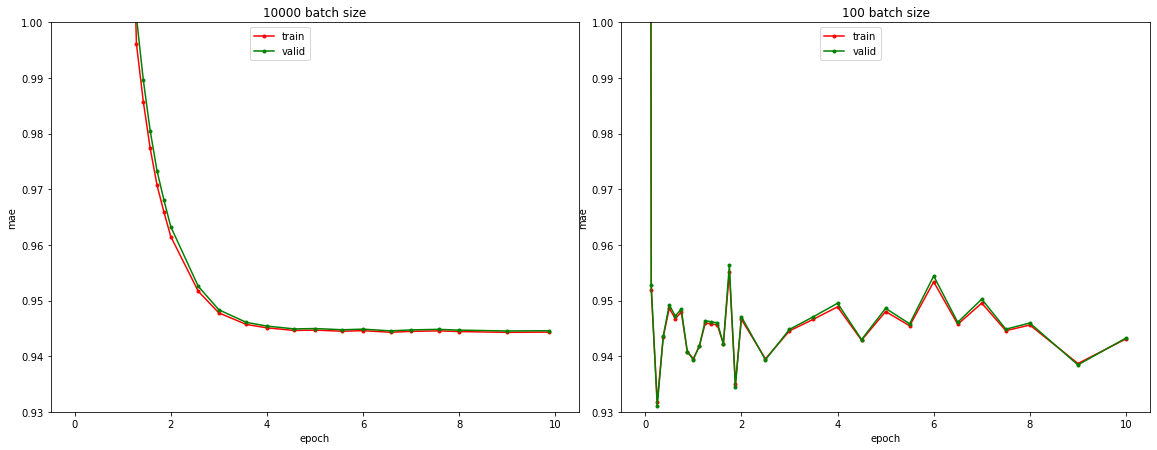

In [57]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,figsize=(16, 6))
fig.tight_layout()
cur_ax = ax_grid[0]
plt.sca(cur_ax)
cur_ax.set_title('10000 batch size')
plt.plot(model_large.trace_epoch, model_large.trace_mae_train, '.r-',label = 'train')
plt.plot(model_large.trace_epoch, model_large.trace_mae_valid, '.g-',label = 'valid')
plt.ylabel('mae')
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(0.5, 1))
plt.ylim([0.93, 1.0])

cur_ax = ax_grid[1]
plt.sca(cur_ax)
cur_ax.set_title('100 batch size')
plt.plot(model_small.trace_epoch, model_small.trace_mae_train, '.r-',label = 'train')
plt.plot(model_small.trace_epoch, model_small.trace_mae_valid, '.g-',label = 'valid')
plt.ylabel('mae')
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(0.5, 1))
plt.ylim([0.93, 1.0])

In [7]:
ag_np.mean(train_tuple[2])

3.5305857142857144